# Compulation of IFRS 9 PIT Forward Looking PD

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_excel("1_TTC_PD.xlsx",sheet_name="TTC_PD")

1) In the df we have 78 snapshots,different borrower attributes, using Logistic Regrn we get Pd_pred and Grades are assigned based on the pd.

In [7]:
df

,Snapshot,Date,SL,Default,id,bureau_score,num_ccj,max_arrears_12m,cc_util,annual_income,emp_length,months_since_recent_cc_delinq,Pd_pred,Grade
0,1,2003-10-01,21912,0,4810802,308,0,0.185325,0.3995,56113,4,13,0.009485,9
1,1,2003-10-01,4458,0,5047938,508,0,0.000000,0.3005,49577,4,15,0.002070,7
2,1,2003-10-01,14523,0,8403557,496,0,0.000000,0.6321,66782,10,5,0.015489,10
3,1,2003-10-01,13364,0,3140641,450,0,0.000000,0.2897,44468,6,13,0.002667,7
4,1,2003-10-01,3733,1,8429363,366,0,2.796597,0.7797,22979,1,7,0.915764,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25456,78,2023-01-01,22041,0,5256024,285,1,0.000000,0.5625,59322,6,13,0.024336,11
25457,78,2023-01-01,6311,0,5906396,484,0,0.000000,0.5506,41811,2,9,0.026629,11
25458,78,2023-01-01,11770,0,6087526,460,0,0.000000,0.6717,57101,7,4,0.039178,12
25459,78,2023-01-01,16455,0,4544378,392,0,0.000000,0.5176,94068,11,3,0.003734,8


In [8]:
MRS=pd.read_excel("1_TTC_PD.xlsx",sheet_name="MRS")

In [9]:
MRS

,LB,UB,Grade
0,0.000000,0.000104,1
1,0.000104,0.000188,2
2,0.000188,0.000338,3
3,0.000338,0.000609,4
4,0.000609,0.001096,5
5,0.001096,0.001972,6
6,0.001972,0.003550,7
7,0.003550,0.006390,8
8,0.006390,0.011502,9
9,0.011502,0.020704,10


# Long Run TTC PD and Observed Default Rates:-

1) For Long Run TTC PD--> In every Grade, we take avg of PD's.
2) For Obs DR--> In every Grade, we take avg of actual default status.

In [12]:
TTC_PD=df.groupby('Grade')[['Pd_pred','Default']].mean().reset_index()
TTC_PD

,Grade,Pd_pred,Default
0,1,0.000092,0.000000
1,2,0.000160,0.000000
2,3,0.000274,0.000000
3,4,0.000477,0.000000
4,5,0.000848,0.000000
5,6,0.001504,0.000000
6,7,0.002704,0.001111
7,8,0.004848,0.003949
8,9,0.008726,0.005373
9,10,0.015595,0.014212


In [13]:
#Rename columns:-
TTC_PD.rename(columns={'Pd_pred':'Long_run_PD','Default':'ODR'},inplace=True)

In [14]:
TTC_PD

,Grade,Long_run_PD,ODR
0,1,0.000092,0.000000
1,2,0.000160,0.000000
2,3,0.000274,0.000000
3,4,0.000477,0.000000
4,5,0.000848,0.000000
5,6,0.001504,0.000000
6,7,0.002704,0.001111
7,8,0.004848,0.003949
8,9,0.008726,0.005373
9,10,0.015595,0.014212


In [15]:
# It is a regulatory requirement, that in any grade ODR can never be 0%. We use minimum give by regulator i.e 0.03%(0.0003)
TTC_PD['ODR']=TTC_PD['ODR'].apply(lambda x:0.0003 if x==0 else x)

In [16]:
TTC_PD

,Grade,Long_run_PD,ODR
0,1,0.000092,0.000300
1,2,0.000160,0.000300
2,3,0.000274,0.000300
3,4,0.000477,0.000300
4,5,0.000848,0.000300
5,6,0.001504,0.000300
6,7,0.002704,0.001111
7,8,0.004848,0.003949
8,9,0.008726,0.005373
9,10,0.015595,0.014212


Text(0.5, 1.0, 'Model PD vs ODR')

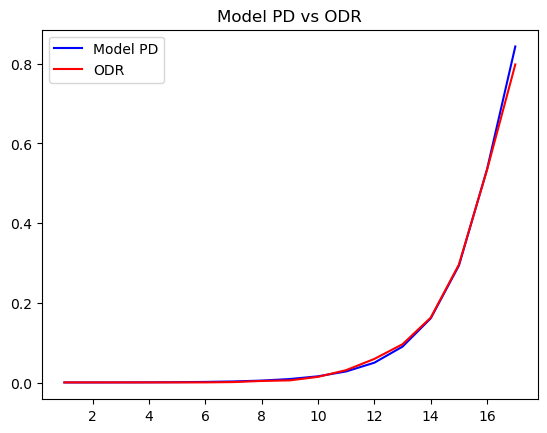

In [17]:
# Plot the Long run PD and ODR:-
plt.plot(TTC_PD['Grade'],TTC_PD['Long_run_PD'],color='blue')
plt.plot(TTC_PD['Grade'],TTC_PD['ODR'],color='red')
plt.legend(['Model PD','ODR'])
plt.title('Model PD vs ODR')

1) Looking at the above, we can say that model can mimic the obs DR's.
2) Rating assignment is correct.

Text(0, 0.5, 'ODR')

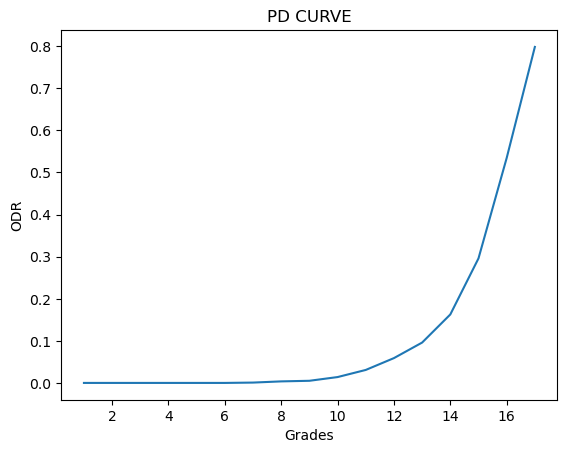

In [19]:
# PD Curve:- plot ODR against Grades.
plt.plot(TTC_PD['Grade'],TTC_PD['ODR'])
plt.title('PD CURVE')
plt.xlabel('Grades')
plt.ylabel('ODR')

1) This TTC PD is the Basel Output.

2) We have to convert this TTC PD to PIT PD via Calibration Techniques.

3) In the PD Curve, we look at two Things:-


# 1) Level of PD Curve:-

Portfolio Level weighted avg Default Rate.

In [23]:
# We find % population in each grade:-
distribution=df.groupby('Grade').size().reset_index(name='count')
distribution

,Grade,count
0,1,4
1,2,47
2,3,246
3,4,741
4,5,1529
5,6,2065
6,7,2701
7,8,3039
8,9,3164
9,10,3096


In [24]:
TTC_PD['%_Population']=distribution['count']/distribution['count'].sum()

In [25]:
TTC_PD

,Grade,Long_run_PD,ODR,%_Population
0,1,0.000092,0.000300,0.000157
1,2,0.000160,0.000300,0.001846
2,3,0.000274,0.000300,0.009662
3,4,0.000477,0.000300,0.029103
4,5,0.000848,0.000300,0.060053
5,6,0.001504,0.000300,0.081104
6,7,0.002704,0.001111,0.106084
7,8,0.004848,0.003949,0.119359
8,9,0.008726,0.005373,0.124268
9,10,0.015595,0.014212,0.121598


TTC PD= Portf Level Weighted Avg PD

In [27]:
TTC_pd=(TTC_PD['ODR'] * TTC_PD['%_Population']).sum()
TTC_pd

0.05236988335100742

# 2) Shape of the PD Curve

1) Shape of the PD Curve is exponential.
2) It is exponential with respect to the rating grade. If Grade deteriorates by 1 notch the PD is increasing exponentially.
3) For shape we find slope/beta---> for beta we need linear relationship---> Regress Grades with Log(odds).
4) 

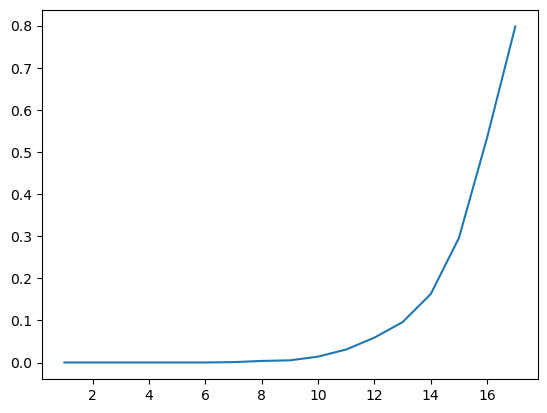

In [30]:
# Exponential Shape:-
plt.plot(TTC_PD['Grade'],TTC_PD['ODR'])

In [31]:
temp=TTC_PD[['Grade','ODR']]
temp['Log_odds']=np.log(temp['ODR']/(1-temp['ODR']))
temp

,Grade,ODR,Log_odds
0,1,0.000300,-8.111428
1,2,0.000300,-8.111428
2,3,0.000300,-8.111428
3,4,0.000300,-8.111428
4,5,0.000300,-8.111428
5,6,0.000300,-8.111428
6,7,0.001111,-6.801654
7,8,0.003949,-5.530421
8,9,0.005373,-5.220992
9,10,0.014212,-4.239363


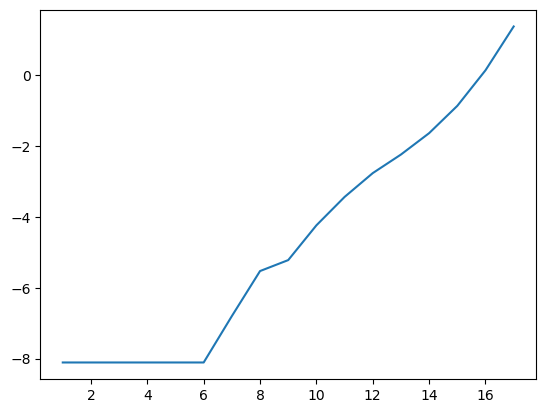

In [32]:
# Now check Linearity of curve:-
plt.plot(temp['Grade'],temp['Log_odds'])

1) Now the curve is linear, we can regress Grades with Log(odds) and find the slope/Beta/shape of the PD curve.

In [34]:
from scipy.stats import linregress

Linregress gives 5 outputs--> slope,intercept,r_value(corr),p-value,std_error

In [36]:
slope,intercept,r_value,p_value,std_error=linregress(x=temp['Grade'],y=temp['Log_odds'])

In [37]:
slope

0.6299314590507241

Therefore Shape of PD Curve= 0.63

1) When rating grade deteriorates by 1 notch PD will increase exponentially but log(odss) will increase linearly by 0.63.

# Macro economic stress Testing Model

1) For IFRS 9 we need PIT FL PD,ie based on the forecast of Macro Economic variables.
2) Our Macro eco variables--> HPI & UR.
3) Economists believe that when UR increases in one qtr, the PD will increase in the next qtr. There is a lagged relationship.( if a person becomes unemployed he will have money to pay EMI for the current qtr, but would default in the next qtr).
4) Therefore we regress Annual DR with the Lagged values of HPI & UR.


In [41]:
# Calculate in each snapshot, what is the avg default rate.
macro_df=df.groupby('Snapshot').agg({'Date': 'first','Default': 'mean'}).reset_index()

In [42]:
macro_df

,Snapshot,Date,Default
0,1,2003-10-01,0.036923
1,2,2004-01-01,0.035484
2,3,2004-04-01,0.032573
3,4,2004-07-01,0.029851
4,5,2004-10-01,0.028481
...,...,...,...
73,74,2022-01-01,0.024169
74,75,2022-04-01,0.022222
75,76,2022-07-01,0.024465
76,77,2022-10-01,0.022923


In [43]:
# Rename the columns in macro_df:-
macro_df.rename(columns={'Date':'observation_date'},inplace=True)

In [44]:
macro_df

,Snapshot,observation_date,Default
0,1,2003-10-01,0.036923
1,2,2004-01-01,0.035484
2,3,2004-04-01,0.032573
3,4,2004-07-01,0.029851
4,5,2004-10-01,0.028481
...,...,...,...
73,74,2022-01-01,0.024169
74,75,2022-04-01,0.022222
75,76,2022-07-01,0.024465
76,77,2022-10-01,0.022923


pd.DateOffset():- is a pandas utility used to shift (add or subtract) dates by a specified time period such as days, months, quarters, or years.

In [46]:
date = pd.Timestamp('2024-01-31')
date

Timestamp('2024-01-31 00:00:00')

In [47]:
date + pd.DateOffset(months=1)

Timestamp('2024-02-29 00:00:00')

In [48]:
#To create a column "Performace_date" after the "observation_date" that will give 3 months later date:-
macro_df.insert(2,'performance_date',macro_df['observation_date']+pd.DateOffset(months=3))

In [49]:
macro_df

,Snapshot,observation_date,performance_date,Default
0,1,2003-10-01,2004-01-01,0.036923
1,2,2004-01-01,2004-04-01,0.035484
2,3,2004-04-01,2004-07-01,0.032573
3,4,2004-07-01,2004-10-01,0.029851
4,5,2004-10-01,2005-01-01,0.028481
...,...,...,...,...
73,74,2022-01-01,2022-04-01,0.024169
74,75,2022-04-01,2022-07-01,0.022222
75,76,2022-07-01,2022-10-01,0.024465
76,77,2022-10-01,2023-01-01,0.022923


In [50]:
# Import Macro Eco variables data:-
MEV=pd.read_excel('1_TTC_PD.xlsx',sheet_name='MEV')

In [51]:
MEV

,Date,HPI,UR
0,2004-01-01,1.1,5.6
1,2004-04-01,1.0,5.5
2,2004-07-01,1.0,5.5
3,2003-10-01,1.0,5.7
4,2004-10-01,1.2,5.3
...,...,...,...
73,2022-01-01,1.4,3.7
74,2022-04-01,-0.3,3.5
75,2022-07-01,-0.2,3.6
76,2022-10-01,0.0,3.4


1) In MEV data, we can see that the dates are not properly sorted, Therefore we want to merge the data to be shown properly, against the macro_df[observation date] we want to merge MEV[HPI and UR Data].
2) this will be a LEFT JOIN as we macro_df will be as it is and MEV[HPI and UR] will be merged based on the observation date.
3) our keys are macro_df 'observation date' and MEV 'date'.


In [53]:
macro_df=macro_df.merge(MEV[['Date','HPI','UR']],left_on='observation_date',right_on='Date',how='left')

In [54]:
macro_df

,Snapshot,observation_date,performance_date,Default,Date,HPI,UR
0,1,2003-10-01,2004-01-01,0.036923,2003-10-01,1.0,5.7
1,2,2004-01-01,2004-04-01,0.035484,2004-01-01,1.1,5.6
2,3,2004-04-01,2004-07-01,0.032573,2004-04-01,1.0,5.5
3,4,2004-07-01,2004-10-01,0.029851,2004-07-01,1.0,5.5
4,5,2004-10-01,2005-01-01,0.028481,2004-10-01,1.2,5.3
...,...,...,...,...,...,...,...
73,74,2022-01-01,2022-04-01,0.024169,2022-01-01,1.4,3.7
74,75,2022-04-01,2022-07-01,0.022222,2022-04-01,-0.3,3.5
75,76,2022-07-01,2022-10-01,0.024465,2022-07-01,-0.2,3.6
76,77,2022-10-01,2023-01-01,0.022923,2022-10-01,0.0,3.4


In [55]:
# drop the extra Date column:-
macro_df.drop(columns='Date',axis=1,inplace=True)

In [56]:
macro_df

,Snapshot,observation_date,performance_date,Default,HPI,UR
0,1,2003-10-01,2004-01-01,0.036923,1.0,5.7
1,2,2004-01-01,2004-04-01,0.035484,1.1,5.6
2,3,2004-04-01,2004-07-01,0.032573,1.0,5.5
3,4,2004-07-01,2004-10-01,0.029851,1.0,5.5
4,5,2004-10-01,2005-01-01,0.028481,1.2,5.3
...,...,...,...,...,...,...
73,74,2022-01-01,2022-04-01,0.024169,1.4,3.7
74,75,2022-04-01,2022-07-01,0.022222,-0.3,3.5
75,76,2022-07-01,2022-10-01,0.024465,-0.2,3.6
76,77,2022-10-01,2023-01-01,0.022923,0.0,3.4


Text(0, 0.5, 'Default %')

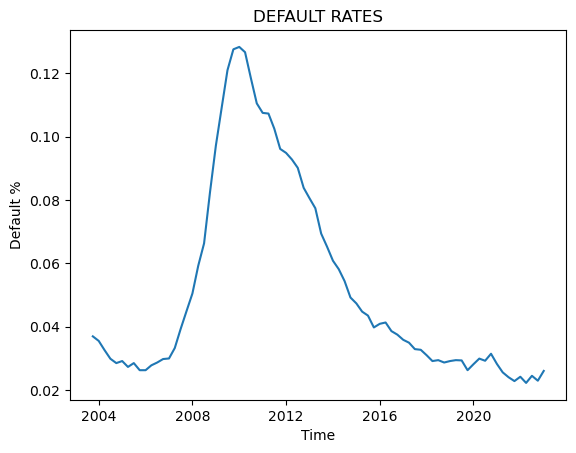

In [57]:
# check the relationship btwn obs_date and Default:-
plt.plot(macro_df['observation_date'],macro_df['Default'])
plt.title('DEFAULT RATES')
plt.xlabel('Time')
plt.ylabel('Default %')

In the above we can see that, during crisis( 2008 ) the Default rates increased significantly.

Text(0, 0.5, 'HPI %')

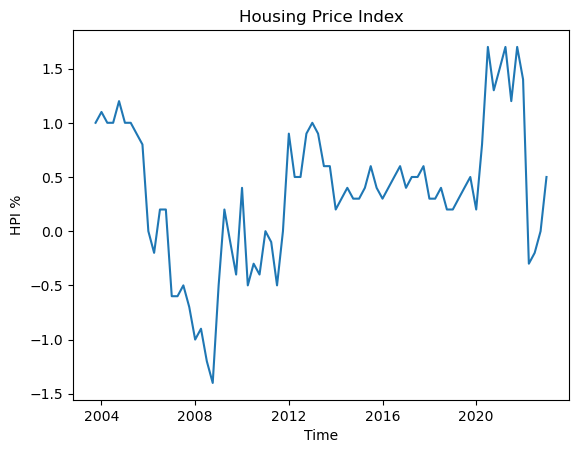

In [59]:
# Check HPI plot:-
plt.plot(macro_df['observation_date'],macro_df['HPI'])
plt.title('Housing Price Index')
plt.xlabel('Time')
plt.ylabel('HPI %')

Here We can see that During crisis (2008) and Covid(2020) HPI fell drastically

Text(0, 0.5, 'Unemployment %')

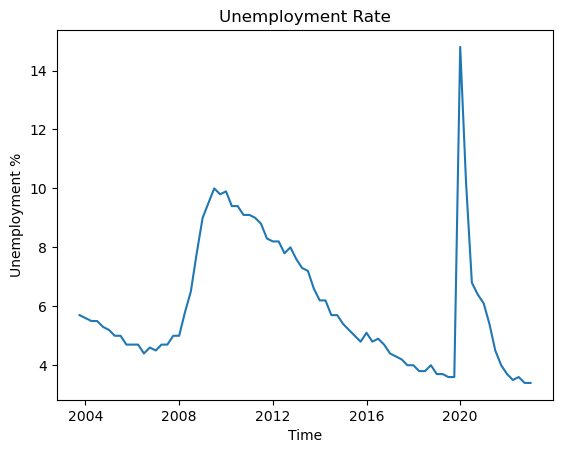

In [61]:
# Check UR Plot:-
plt.plot(macro_df['observation_date'],macro_df['UR'])
plt.title('Unemployment Rate')
plt.xlabel('Time')
plt.ylabel('Unemployment %')

Here We can see that During crisis (2008) and Covid(2020) Unemployment Rate increased drastically

1) Economists believe that when UR increases in one qtr, the PD will increase in the next qtr. There is a lagged relationship.( if a person becomes unemployed he will have money to pay EMI for the current qtr, but would default in the next qtr).
2) Therefore we regress Annual DR with the Lagged values of HPI & UR.

In [64]:
#For Lagged values, we use shift method:-
macro_df['HPI_Lag1']=macro_df['HPI'].shift(1)
macro_df['UR_Lag1']=macro_df['UR'].shift(1)

In [65]:
macro_df

,Snapshot,observation_date,performance_date,Default,HPI,UR,HPI_Lag1,UR_Lag1
0,1,2003-10-01,2004-01-01,0.036923,1.0,5.7,NaN,NaN
1,2,2004-01-01,2004-04-01,0.035484,1.1,5.6,1.0,5.7
2,3,2004-04-01,2004-07-01,0.032573,1.0,5.5,1.1,5.6
3,4,2004-07-01,2004-10-01,0.029851,1.0,5.5,1.0,5.5
4,5,2004-10-01,2005-01-01,0.028481,1.2,5.3,1.0,5.5
...,...,...,...,...,...,...,...,...
73,74,2022-01-01,2022-04-01,0.024169,1.4,3.7,1.7,4.0
74,75,2022-04-01,2022-07-01,0.022222,-0.3,3.5,1.4,3.7
75,76,2022-07-01,2022-10-01,0.024465,-0.2,3.6,-0.3,3.5
76,77,2022-10-01,2023-01-01,0.022923,0.0,3.4,-0.2,3.6


1) .shift()---> pandas method used to shift data forward or backward along an axis (rows or columns), without changing the index labels.
2) for 1 lag ie down---> .shift(1)
3) for 1 lag upwards---> .shift(-1)

Since index loc 0 in macro_df has null value , we will drop the first row.

In [68]:
macro_df.drop(0,axis=0,inplace=True)
macro_df

,Snapshot,observation_date,performance_date,Default,HPI,UR,HPI_Lag1,UR_Lag1
1,2,2004-01-01,2004-04-01,0.035484,1.1,5.6,1.0,5.7
2,3,2004-04-01,2004-07-01,0.032573,1.0,5.5,1.1,5.6
3,4,2004-07-01,2004-10-01,0.029851,1.0,5.5,1.0,5.5
4,5,2004-10-01,2005-01-01,0.028481,1.2,5.3,1.0,5.5
5,6,2005-01-01,2005-04-01,0.029126,1.0,5.2,1.2,5.3
...,...,...,...,...,...,...,...,...
73,74,2022-01-01,2022-04-01,0.024169,1.4,3.7,1.7,4.0
74,75,2022-04-01,2022-07-01,0.022222,-0.3,3.5,1.4,3.7
75,76,2022-07-01,2022-10-01,0.024465,-0.2,3.6,-0.3,3.5
76,77,2022-10-01,2023-01-01,0.022923,0.0,3.4,-0.2,3.6


In [69]:
# Now regress Default rates with Lagged values of HPI and UR (Using the Matrix Based Approach)
import statsmodels.api as sm

In [70]:
X= macro_df[['HPI_Lag1','UR_Lag1']]
Y= macro_df['Default']

In [71]:
model= sm.OLS(Y,X).fit()

In [72]:
model

In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Default   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                              367.1
Date:                Fri, 30 Jan 2026   Prob (F-statistic):                    1.84e-39
Time:                        12:53:09   Log-Likelihood:                          197.49
No. Observations:                  77   AIC:                                     -391.0
Df Residuals:                      75   BIC:                                     -386.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HPI_Lag1      -0.0162      0.003     -5.171      0.000      -0.022      -0.010
UR_Lag1        0.0096      0.000     26.554      0.000       0.009       0.010
==============================================================================
Omnibus:                       70.324   Durbin-Watson:                   0.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              712.689
Skew:                          -2.550   Prob(JB):                    1.74e-155
Kurtosis:                      17.005   Cond. No.                         9.36
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1) HPI_Lag1 coeff--->  - 0.0162 ie When HPI increases by 1% (0.01) DR's will decrease by 1.62% (0.0162).
2) UR_Lag1 coeff --->    0.0096 i.e When UR increases by 1% (0.01) DR's will increase by 0.096% (0.0096).
3) P-Value for both are less than 5% and R2 is also high. Therefore model is good.

# PREDICT

1) Bank has Macro Eco Analysis Team which will provide the Forecast of the macro eco variables for the upcoming next qtrs.
2) Forecast will have different Scenarios :- Base, Stressed and many more.
3) below we have the forecast for the base scenario.

In [77]:
MEF= pd.read_excel('1_TTC_PD.xlsx',sheet_name='MEF')
MEF

,Date,HPI,UR
0,2023-04-01,0.32,5.81
1,2023-07-01,0.35,5.92
2,2023-10-01,0.27,5.64
3,2024-01-01,0.33,5.87
4,2024-04-01,0.25,5.59
5,2024-07-01,0.23,5.53
6,2024-10-01,0.23,5.53
7,2025-01-01,0.28,5.70
8,2025-04-01,0.18,5.36
9,2025-07-01,0.28,5.24


Forecasted PIT FL DR's = α + β1.x1 + β2.x2

In [79]:
# We have to give the data the same way while fitting:- 
PIT_Forecast=MEF[['HPI','UR']]
PIT_Forecast

,HPI,UR
0,0.32,5.81
1,0.35,5.92
2,0.27,5.64
3,0.33,5.87
4,0.25,5.59
5,0.23,5.53
6,0.23,5.53
7,0.28,5.70
8,0.18,5.36
9,0.28,5.24


In [80]:
MEF_pred=model.predict(PIT_Forecast)
MEF_pred

0     0.050685
1     0.051258
2     0.049858
3     0.051100
4     0.049701
5     0.049447
6     0.049447
7     0.050274
8     0.048620
9     0.045851
10    0.053069
dtype: float64

1) Interpretation:- In the next qtr our Forecasted Portfolio PIT DR= 5.07%, our historical Portfolio TTC PD = 5.24%.
2) Therefore, The Shape of the PD curve will remain the same.
3) The Level of PD curve will change from 5.24% to 5.07% to make TTC PD to PIT FL PD using calibration techniques.

# Calibration

In [83]:
TTC_PD

,Grade,Long_run_PD,ODR,%_Population
0,1,0.000092,0.000300,0.000157
1,2,0.000160,0.000300,0.001846
2,3,0.000274,0.000300,0.009662
3,4,0.000477,0.000300,0.029103
4,5,0.000848,0.000300,0.060053
5,6,0.001504,0.000300,0.081104
6,7,0.002704,0.001111,0.106084
7,8,0.004848,0.003949,0.119359
8,9,0.008726,0.005373,0.124268
9,10,0.015595,0.014212,0.121598


In [84]:
TTC_pd

0.05236988335100742

In [158]:
# Target central tendency:-
Q2_2023=MEF_pred.iloc[0]
Q2_2023

0.050684909590861346

In [162]:
# We find Scaler:-
scaler= Q2_2023/TTC_pd
scaler

0.9678255200827431

In [164]:
# Create a new df:-
cal_df_Q2_2023=pd.DataFrame()

In [174]:
# add Grade, ODR and % population:-
cal_df_Q2_2023=TTC_PD[['Grade','ODR','%_Population']]
cal_df_Q2_2023

,Grade,ODR,%_Population
0,1,0.000300,0.000157
1,2,0.000300,0.001846
2,3,0.000300,0.009662
3,4,0.000300,0.029103
4,5,0.000300,0.060053
5,6,0.000300,0.081104
6,7,0.001111,0.106084
7,8,0.003949,0.119359
8,9,0.005373,0.124268
9,10,0.014212,0.121598


In [178]:
# Rename the column ODR to PD:-
cal_df_Q2_2023.rename(columns={'ODR':'PD'},inplace=True)
cal_df_Q2_2023

,Grade,PD,%_Population
0,1,0.000300,0.000157
1,2,0.000300,0.001846
2,3,0.000300,0.009662
3,4,0.000300,0.029103
4,5,0.000300,0.060053
5,6,0.000300,0.081104
6,7,0.001111,0.106084
7,8,0.003949,0.119359
8,9,0.005373,0.124268
9,10,0.014212,0.121598


In [182]:
# Annual Calibrate PID PD:-
cal_df_Q2_2023['Annual_cal_PD']=cal_df_Q2_2023['PD']*scaler
cal_df_Q2_2023

,Grade,PD,%_Population,Annual_cal_PD
0,1,0.000300,0.000157,0.000290
1,2,0.000300,0.001846,0.000290
2,3,0.000300,0.009662,0.000290
3,4,0.000300,0.029103,0.000290
4,5,0.000300,0.060053,0.000290
5,6,0.000300,0.081104,0.000290
6,7,0.001111,0.106084,0.001075
7,8,0.003949,0.119359,0.003822
8,9,0.005373,0.124268,0.005200
9,10,0.014212,0.121598,0.013755


Limitation of using Scaler Calibration:-
1) If Scaler is above 1, it might make the PD greated than 100% and PD can never be more than 100%. Therefor we cap it at 100%.

In [185]:
cal_df_Q2_2023['Annual_cal_PD']=np.where(cal_df_Q2_2023['PD']*scaler >1,1,cal_df_Q2_2023['PD']*scaler)

In [187]:
cal_df_Q2_2023

,Grade,PD,%_Population,Annual_cal_PD
0,1,0.000300,0.000157,0.000290
1,2,0.000300,0.001846,0.000290
2,3,0.000300,0.009662,0.000290
3,4,0.000300,0.029103,0.000290
4,5,0.000300,0.060053,0.000290
5,6,0.000300,0.081104,0.000290
6,7,0.001111,0.106084,0.001075
7,8,0.003949,0.119359,0.003822
8,9,0.005373,0.124268,0.005200
9,10,0.014212,0.121598,0.013755


In [189]:
# Convert Annual calibrated PD to Quarterly Calibrated PD:-
cal_df_Q2_2023['Quarterly_cal_PD']=1-(1-cal_df_Q2_2023['Annual_cal_PD'])**0.25

In [191]:
cal_df_Q2_2023

,Grade,PD,%_Population,Annual_cal_PD,Quarterly_cal_PD
0,1,0.000300,0.000157,0.000290,0.000073
1,2,0.000300,0.001846,0.000290,0.000073
2,3,0.000300,0.009662,0.000290,0.000073
3,4,0.000300,0.029103,0.000290,0.000073
4,5,0.000300,0.060053,0.000290,0.000073
5,6,0.000300,0.081104,0.000290,0.000073
6,7,0.001111,0.106084,0.001075,0.000269
7,8,0.003949,0.119359,0.003822,0.000957
8,9,0.005373,0.124268,0.005200,0.001303
9,10,0.014212,0.121598,0.013755,0.003457


In [193]:
# check if calibrated PIT PD is equal to Tgt Central Tendency (5.07%)
cal_PIT_PD=(cal_df_Q2_2023['Annual_cal_PD']*cal_df_Q2_2023['%_Population']).sum()

In [195]:
cal_PIT_PD

0.050684909590861346

# Log Odds Shift Calibration:-

1) We find log odds---> PD/(1-PD)
2) Fitted Log Odds--->  Equation--> LN(odds)= α + β.Rating Grade. Taking seed value of α.  α--> Level of Curve β--> Shape of Curve.
3) Calibrated PD--> using sigmoid function--> exp(LN(odds))/(1+exp(LN(odds))).
4) We find intercept such that the abs|error| is minimized. error = Target - Calibrated PIT PD.

In [209]:
# create a temp df:-
temp= TTC_PD[['Grade','ODR','%_Population']]
temp

,Grade,ODR,%_Population
0,1,0.000300,0.000157
1,2,0.000300,0.001846
2,3,0.000300,0.009662
3,4,0.000300,0.029103
4,5,0.000300,0.060053
5,6,0.000300,0.081104
6,7,0.001111,0.106084
7,8,0.003949,0.119359
8,9,0.005373,0.124268
9,10,0.014212,0.121598


In [215]:
# Find Log Odds:-
temp['Log_Odds']=np.log(temp['ODR']/(1-temp['ODR']))
temp

,Grade,ODR,%_Population,Log_Odds
0,1,0.000300,0.000157,-8.111428
1,2,0.000300,0.001846,-8.111428
2,3,0.000300,0.009662,-8.111428
3,4,0.000300,0.029103,-8.111428
4,5,0.000300,0.060053,-8.111428
5,6,0.000300,0.081104,-8.111428
6,7,0.001111,0.106084,-6.801654
7,8,0.003949,0.119359,-5.530421
8,9,0.005373,0.124268,-5.220992
9,10,0.014212,0.121598,-4.239363


To see Slope and Intercept we use Linregress:

In [218]:
from scipy.stats import linregress

In [228]:
slope,intercept,r,pvalue,std_error = linregress(temp['Grade'],temp['Log_Odds'])

In [244]:
slope #Shape of the Curve, remains the same.

0.6299314590507241

In [242]:
intercept  #Level of the Curve. We change it to go from TTC_PD to PIT_PD.

-10.369163274316868

In [246]:
# Seed value of intercept
adj_intercept=-8

In [250]:
temp['Fitted_Log_Odds']=adj_intercept + slope*temp['Grade']
temp

,Grade,ODR,%_Population,Log_Odds,Fitted_Log_Odds
0,1,0.000300,0.000157,-8.111428,-7.370069
1,2,0.000300,0.001846,-8.111428,-6.740137
2,3,0.000300,0.009662,-8.111428,-6.110206
3,4,0.000300,0.029103,-8.111428,-5.480274
4,5,0.000300,0.060053,-8.111428,-4.850343
5,6,0.000300,0.081104,-8.111428,-4.220411
6,7,0.001111,0.106084,-6.801654,-3.590480
7,8,0.003949,0.119359,-5.530421,-2.960548
8,9,0.005373,0.124268,-5.220992,-2.330617
9,10,0.014212,0.121598,-4.239363,-1.700685


In [252]:
# Annual Calibrated PIT PD:-
temp['Annual_cal_PD']=np.exp(temp['Fitted_Log_Odds'])/(1+np.exp(temp['Fitted_Log_Odds']))
temp

,Grade,ODR,%_Population,Log_Odds,Fitted_Log_Odds,Annual_cal_PD
0,1,0.000300,0.000157,-8.111428,-7.370069,0.000629
1,2,0.000300,0.001846,-8.111428,-6.740137,0.001181
2,3,0.000300,0.009662,-8.111428,-6.110206,0.002215
3,4,0.000300,0.029103,-8.111428,-5.480274,0.004151
4,5,0.000300,0.060053,-8.111428,-4.850343,0.007765
5,6,0.000300,0.081104,-8.111428,-4.220411,0.014480
6,7,0.001111,0.106084,-6.801654,-3.590480,0.026845
7,8,0.003949,0.119359,-5.530421,-2.960548,0.049240
8,9,0.005373,0.124268,-5.220992,-2.330617,0.088619
9,10,0.014212,0.121598,-4.239363,-1.700685,0.154376


In [256]:
cal_PIT_PD= (temp['Annual_cal_PD']*temp['%_Population']).sum()
cal_PIT_PD

0.2121109389222412

In [258]:
# Target Central Tendency :-
Q2_2023

0.050684909590861346

1) from scipy.optimize import minimize_scaler
2) Now We Optimize the intercept such that abs(tgt - Cal PIT PD ) is minimized.

In [285]:
from scipy.optimize import minimize_scalar

In [295]:
def objective(adj_intercept):
    temp['Fitted_Log_Odds']=adj_intercept + slope*temp['Grade']
    temp['Annual_cal_PD']=np.exp(temp['Fitted_Log_Odds'])/(1+np.exp(temp['Fitted_Log_Odds']))
    cal_PIT_PD= (temp['Annual_cal_PD']*temp['%_Population']).sum()
    return abs(Q2_2023 - cal_PIT_PD)

In [297]:
result=minimize_scalar(objective)

In [301]:
result.x

-10.324328444132407

In [303]:
result.fun

2.4661052366869995e-09

In [305]:
temp

,Grade,ODR,%_Population,Log_Odds,Fitted_Log_Odds,Annual_cal_PD
0,1,0.000300,0.000157,-8.111428,-9.694397,0.000062
1,2,0.000300,0.001846,-8.111428,-9.064466,0.000116
2,3,0.000300,0.009662,-8.111428,-8.434534,0.000217
3,4,0.000300,0.029103,-8.111428,-7.804603,0.000408
4,5,0.000300,0.060053,-8.111428,-7.174671,0.000765
5,6,0.000300,0.081104,-8.111428,-6.544740,0.001436
6,7,0.001111,0.106084,-6.801654,-5.914808,0.002692
7,8,0.003949,0.119359,-5.530421,-5.284877,0.005042
8,9,0.005373,0.124268,-5.220992,-4.654945,0.009425
9,10,0.014212,0.121598,-4.239363,-4.025014,0.017550


Therefore Optimization has given us the best case PD's and we have converted the TTC PD to PIT FL PD